<a href="https://colab.research.google.com/github/sundarjhu/UACJ_Jornada2021/blob/main/Espectro_UACJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detalles sobre este notebook de python.

In [1]:
__author__ = 'Aida Nava de Wofford <awofford@astro.unam.mx>, Sundar Srinivasan <s.srinivasan@irya.unam.mx>'
__version__ = '20210421'
__datasets__ = ['SDSS']  # datos usados en este notebook
__keywords__ = ['Taller UACJ 2021', 'SDSS', 'espectro'], # palabras clave relevantes a este notebook

# Instalación de versiones necesarias de dependencias.

In [49]:
!pip install --force-reinstall jsonschema==3.2.0

  Using cached https://files.pythonhosted.org/packages/c5/8f/51e89ce52a085483359217bc72cdbf6e75ee595d5b1d4b5ade40c7e018b8/jsonschema-3.2.0-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/f0/b8/de/b593ad311be4eb458499d100db081e453576032272398b7ddc/pyrsistent-0.17.3-cp37-cp37m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/aa/cb45262569fcc047bf070b5de61813724d6726db83259222cd7b4c79821a/attrs-20.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ae/42/2876a3a136f8bfa9bd703518441c8db78ff1eeaddf174baa85c083c1fd15/setuptools-56.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8e/e2/49966924c93909d47612bb47d911448140a2f6c1390aec2f4c1afbe3748f/importlib_metadata-4.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/7a/e881b5a

# Dar click "RESTART RUNTIME" arriba y proseguir con la práctica.

# Objetivos de la práctica "Análisis del Espectro Óptico de la Galaxia KISSR 298."


* Exploraremos métodos manuales y automatizados de obtener los parámetros necesarios para bajar el espectro de una galaxia de una base de datos.  
* Bajaremos el espectro.
* Haremos un par de correcciones al espectro. 

# Análisis del Espectro Óptico de la Galaxia KISSR 298.

Importamos algunos de los módulos de python necesarios, en este caso numpy y "SDSS" de la biblioteca de astroquery.

* "numpy" es un módulo de Python que se utiliza para trabajar con matrices.También tiene funciones para trabajar en el dominio del álgebra lineal, la transformada de Fourier y las matrices.
* "astroquery" es un conjunto de herramientas para consultar bases de datos y formularios web astronómicos.


In [45]:
import warnings, numpy as np
warnings.filterwarnings("ignore", category = np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
try:
  from astroquery.sdss import SDSS
except:
  !pip install astroquery
  from astroquery.sdss import SDSS

## Método Manual de obtención de las coordenadas del objeto.

Para poder bajar el espectro de KISSR 298 de la base de datos, necesitamos sus coordenadas (RA, Dec) o (longitude, latitude) en el sistema de referencia Equatorial (J2000.0). 

INSTRUCCIONES. 

* Encuentra las coordenadas buscando al objeto por su nombre en la  base de datos de NED:
https://ned.ipac.caltech.edu/.

* Asigna a las variables de abajo las coordenadas del objecto que encontraste.



In [46]:
RA_manual=0 # longitude in Equatorial J2000
Dec_manual=0 # latitude in Equatorial J2000

Los métodos manuales tienen la desventaja de que uno comete errores al teclear. Aprendamos entonces a usar el método automático.

## Método manual de obtención de los IDs de la placa, fecha de observación y fibra.

Para bajar el espectro de KISSR 298 la base de datos, necesitamos los IDs de la placa, la fecha y la fibra con que se usaron para obtener los datos. 

INSTRUCCIONES. 

*   Busca el objecto usando las coordenadas en: https://skyserver.sdss.org/dr14/en/tools/chart/chartinfo.aspx. 
*   Dále a "Get Image" para ver la imagen del objeto. Puedes cambiar el tamaño de la imagen con los botones de "+" y "-".
* Haz click en "Explore" para ir a donde se encuentra el espectro. 
* Abajo a la derecha, en donde dice "Interactive Spectrum", hay una tabla con información sobre las observaciones del objeto. 
* Asigna a las variables de abajo las coordenadas del objecto que encontraste.





In [47]:
plate_manual=-1 # plate
mjd_manual=-1 # modified Julian date
fiberid_manual=-1 # fiberid

Armamos el nombre del camino que lleva al espectro.

In [48]:
archivo_con_espectro_man = 'https://dr14.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid='+str(plate_manual)+'&mjd='+str(mjd_manual)+'&fiberid='+str(fiberid_manual)
print(archivo_con_espectro_man)

https://dr14.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=-1&mjd=-1&fiberid=-1


## Método automático de obtención de las coordenadas del objeto.

Importamos el módulo necesario para bajar las coordenadas.

In [5]:
from astropy import coordinates as coords

* Las bases de datos astronómicas tienen un servicio de "busqueda por nombre".

* Utilizaremos el módulo `coords` para buscar de manera automática las coordenadas a partir del nombre del objeto.

* SkyCoord consulta la base de datos CDS (http://cdsweb.u-strasbg.fr/) para encontrar las coordenadas del objeto.

In [7]:
pos = coords.SkyCoord.from_name("KISSR 298") #pos variable para la posición del objeto.
print("position: ", pos)

position:  <SkyCoord (ICRS): (ra, dec) in deg
    (202.457448, 29.579719)>


## Método automático de obtención de los IDs de la placa, fecha y fibra.

Una vez que tenemos las coordenadas del objeto, buscamos en la base de datos de SDSS (Sloan Digital Sky Survey) los IDs que indican la placa con que se tomó el espectro, la fecha de observación y la fibra correspondiente a la posición del objeto.

In [8]:
tabla_sdss = SDSS.query_region(pos, spectro = True)
plate = tabla_sdss[0][list(tabla_sdss.columns).index('plate')]
mjd = tabla_sdss[0][list(tabla_sdss.columns).index('mjd')]
fiberID = tabla_sdss[0][list(tabla_sdss.columns).index('fiberID')]

Con estos parámetros podemos buscar el espectro.

In [9]:
sp = SDSS.get_spectra(matches = tabla_sdss, plate = plate, mjd = mjd, fiberID = fiberID)[0]

## El espectro está en el segundo encabezado del archivo (sp[1])


In [10]:
specdata = sp[1].data
print(specdata)

[(13.479021, 3.5816, 0.06797916, 0, 0, 1.1088611 , 9.002381, 13.217207)
 (19.215475, 3.5817, 0.06977836, 0, 0, 1.108475  , 9.212716, 13.737914)
 (14.267138, 3.5818, 0.07592517, 0, 0, 1.108091  , 9.300478, 13.168895)
 ...
 ( 8.162261, 3.9645, 0.35342726, 0, 0, 0.7729795 , 4.512267, 12.689797)
 (11.752623, 3.9646, 0.        , 0, 0, 0.77300555, 4.811207, 12.891481)
 (15.343176, 3.9647, 0.28280747, 0, 0, 0.77303153, 4.932665, 12.677738)]


Abrimos el archivo y construimos los vectores de longitudes de onda (wave),  flujos (flux), y de errores en los flujos (err).

Importamos el módulo necesario para guardar las unidades de longitud de onda y flujo.

In [11]:
from astropy import units as u


In [12]:
wave = 10**specdata['loglam'] * u.AA # longitud de onda
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') # flujo
#ivar = specdata['ivar']# inverso de la varianza
#err = 1 / np.sqrt(ivar) # error * u.Unit('erg cm-2 s-1 AA-1') # error en el flujo

Importamos el módulo para graficar (matplotlib).

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

# Método manual de poner unidades en los ejes de las gráficas.

Poner las unidades de los ejes de manera manual en las gráficas puede llevar a errores. ¿Qué errores notas en las unidades de los ejes de la gráfica de abajo (compara con la gráfica del método automático de más abajo)?

''

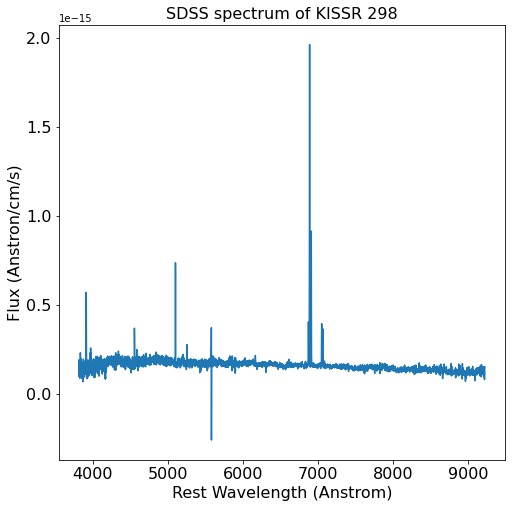

In [14]:
f, ax = plt.subplots(figsize = (8, 8))
ax.plot(wave, flux)
plt.xlabel('Rest Wavelength (Anstrom)', fontsize = 16)
plt.ylabel('Flux (Anstron/cm/s)', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('SDSS spectrum of KISSR 298', fontsize = 16)
;

## Método automático de poner las unidades en la gráfica.

Instalamos el paquete specutils que permite poner las unidades correctas en los ejes de la gráfica del espectro (specutils) y las dependencias necesarias.

In [15]:
!pip install specutils

     |████████████████████████████████| 645kB 22.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 174kB 49.2MB/s 
     |████████████████████████████████| 512kB 38.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for specutils: filename=specutils-1.2-cp37-none-any.whl size=177575 sha256=74131b6f221e7e117138354c02963cf1a3a400b8ac2fd5b54be3ba52315b788d
  Stored in directory: /root/.cache/pip/wheels/af/88/32/7ccdd3bfdd9469747850b14674938ccc180caf58f69e006659
  Created wheel for asdf: filename=asdf-2.7.3-cp37-none-any.whl size=573206 sha256=b3b1d9d1777262cc6318d3181d60b849f8ebf8d979d6e1ad5db80235677db80a
  Stored in directory: /root/.cache/pip/wheels/01/cc/ff/c29ad7c212112bbdd9f416c24915607bdf2b4d83641f876e2e
Successfully built specutils asdf
  Created wheel for gwcs: fi

Vamos a crear un objeto llamado "Spectrum1D" que vamos a graficar.

In [16]:
from specutils import Spectrum1D
spec = Spectrum1D(spectral_axis=wave, flux=flux)

Importamos el módulo para usar unidades posteriormente en la gráfica. (quantity_support)

In [19]:
from astropy.visualization import quantity_support
quantity_support();  # para obtener las unidades en los ejes de la gráfica de abajo.

Graficamos el espectro. La ventaja de specutils es que las unidades de los ejes de la gráfica están correctas.

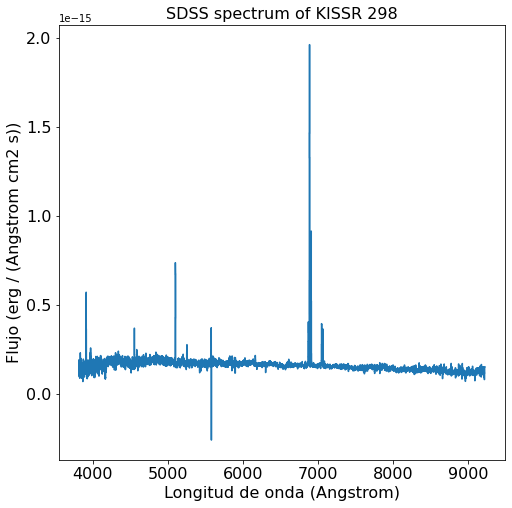

In [34]:
f, ax = plt.subplots(figsize = (8, 8))
ax.step(spec.spectral_axis, spec.flux)
plt.xlabel('Longitud de onda ({})'.format(spec.spectral_axis.unit), fontsize = 16) 
plt.ylabel('Flujo ({})'.format(spec.flux.unit), fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('SDSS spectrum of KISSR 298', fontsize = 16);

# Corrección del espectro por polvo en la Vía Láctea

Vamos a corregir la luz de las estrellas que se encuentran en la galaxia KISSR 298 por extinción debida al polvo en nuestra Galaxia.

Para esto, necesitamos el exceso de color debido al polvo en nuestra Galaxia en la dirección de KISSR 298. 

## Método manual de obtención de extinciones en los filtros Blue y Visible. Las extinciones, A$_B$ y A$_V$, tienen unidades de magnitud.

INSTRUCCIONES.

* Para calcular el exceso de color, E(B-V), primero encuentra la extinción Galáctica en las bandas Landolt B y V. Para esto ve a: https://ned.ipac.caltech.edu/ 
* Introduce el nombre del objeto
* Ve a la pestaña de Galactic Extinction
* Ve a la columna "Galactic Extinctions", en donde encontrarás los valores de B y V.
* Asigna a las variables A_B y A_V de abajo, el valor de las extinciones en para observaciones en los filstros Blue y Visible.
* La variable "ebvmw" contiene el exceso de color, E(B-V) debido al polvo en la Vía Láctea (Milky Way).



In [25]:
A_B=0 #0.062 extinción Galáctica en la banda B
A_V=0 #0.047 extinción Galáctica en la banda V
ebvmw=A_B-A_V # exceso de color E(B-V) de la Vía Láctea (Milky Way)

## Método automático de obtención de las extinciones.

* Impotamos el módulo para poder obtener la extinción. 
* La tabla de extinción debida al polvo Galáctico del InfraRed Science Archive (IRSA):
* https://irsa.ipac.caltech.edu/applications/DUST/index.html





In [26]:
from astroquery.irsa_dust import IrsaDust
#Have the `coords` module automatically look up the coordinates from the name of the source 
pos = coords.SkyCoord.from_name("KISSR 298")
table = IrsaDust.get_extinction_table(pos)

* Obtenemos los valores de extinción para los filtros CTIO B y V
*  Esto toma los valores de A_lambda calculados de acuerdo con la prescripción de Schlafly & Finkbeiner (2011), que amplía el Cardelli et al. (1989; CCM89) a longitudes de onda más largas.

In [27]:
A_B = table['A_SandF'][table['Filter_name'] == 'CTIO B'] # extinción Galáctica en la banda B
A_V = table['A_SandF'][table['Filter_name'] == 'CTIO V'] # extinción Galáctica en la banda V
ebvmw = A_B - A_V # exceso de color E(B-V) de la Vía Láctea (Milky Way)
print(ebvmw.quantity)

[0.017] mag


Importamos el paquete necesario para hacer la corrección por polvo.

In [28]:
!pip install git+https://github.com/karllark/dust_extinction.git

  Cloning https://github.com/karllark/dust_extinction.git to /tmp/pip-req-build-3k3zk71d
  Running command git clone -q https://github.com/karllark/dust_extinction.git /tmp/pip-req-build-3k3zk71d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dust-extinction: filename=dust_extinction-1.1.dev1+g8bd0b2f-cp37-none-any.whl size=424827 sha256=0b1ad3e4f2ad5a80e94140b1fae360e29ea08d77acbdb40c541efd0dd7d81f86
  Stored in directory: /tmp/pip-ephem-wheel-cache-nzvh26_4/wheels/bc/75/93/10949c6b5bee8da271150d593844866943a9fb3e42dff15e9c
Successfully built dust-extinction


Importamos la función que me permite corregir el flujo en cada longitud de onda debida al polvo para el valor de ebvmw dado.

In [29]:
# Importamos el modelo de Cardelli, Clayton & Mathis (1989) con A_V = 1 y R_V = 3.1
from dust_extinction.parameter_averages import CCM89
from scipy.optimize import curve_fit

# Definimos el modelo de enrojecimiento debido al polvo

ext = CCM89(Rv=3.1)



En principio se debe calcular el flujo corregido, uflux, usando el exceso de color ebvmw que obtuvimos arriba. Sin embargo, para la galaxia KISSR 298, la extinción en la Vía Láctea es muy pequeña. Entonces para ilustrar lo que sucede cuando la extinción es mayor, utilizaremos un valor artificial de E(B-V).

In [30]:
# Flujo corregido (unextinguished flux )
ebvmw=0.1 # en vez de tomar el valor real (E(B-V)=0.017 mag), vamos a usar un valor más grande. Sino, es dificil ver el efecto del polvo en el espectro.
uflux = flux / ext.extinguish(1/wave.to(u.micron), Ebv=ebvmw)

Graficamos el espectro antes y después de la corrección por enrojecimiento en la Vía Láctea. ¿Cuál es el espectro más luminoso y porqué?

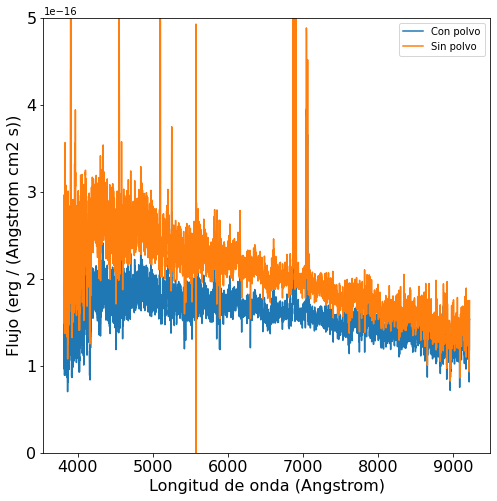

In [35]:
f, ax = plt.subplots(figsize = (8, 8))  

ax.step(spec.spectral_axis, spec.flux, label='Con polvo')
ax.plot(wave,uflux, label='Sin polvo')
plt.xlabel('Longitud de onda ({})'.format(spec.spectral_axis.unit), fontsize = 16) 
plt.ylabel('Flujo ({})'.format(spec.flux.unit), fontsize = 16)
plt.ylim(0,5e-16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'best');

# Corrección por corrimiento al rojo de la galaxia que se está moviendo radialmente respecto al observador.

## Método manual de obtención del corrimiento al rojo, z.

INSTRUCCIONES. 

* Determina el corrimiento al rojo (redshift), z, de la galaxia usando la base de datos de NED: : https://ned.ipac.caltech.edu/ 
* Introduce el nombre del objeto
* Ve a la pestaña de "redshift"
* Asigna el corrimiento al rojo que encontraste a la variable z.




In [36]:
z=0 #Corrimiento al rojo encontrado manualmente

# Método automático de obtener el corrimiento al rojo.

Usamos la base de dato de NED.

In [37]:
from astroquery.ned import Ned
result_table = Ned.query_object("KISSR 298")
z = result_table['Redshift']
print(z)

 Redshift 
----------
  0.048991


Corregimos el vector de longitudes de onda por corrmiento al rojo.

In [38]:
wave_rest = wave / (1 + z)

Graficamos el espectro antes y después de la corrección por corrimiento al rojo.

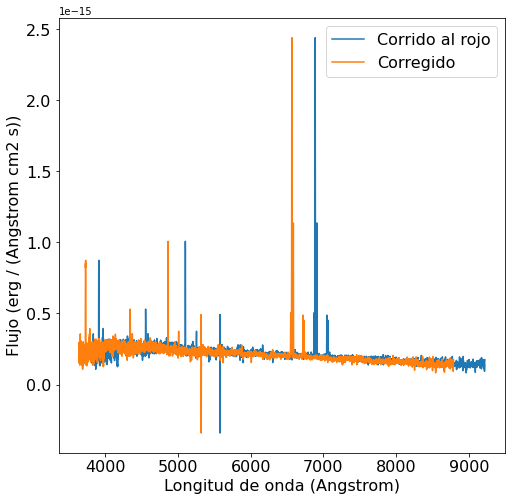

In [44]:
f, ax = plt.subplots(figsize = (8, 8))  

ax.plot(wave, uflux, label="Corrido al rojo")
ax.plot(wave_rest, uflux, label="Corregido")
plt.xlabel('Longitud de onda ({})'.format(spec.spectral_axis.unit), fontsize = 16) 
plt.ylabel('Flujo ({})'.format(spec.flux.unit), fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(prop = {'size': 16});

La galaxia está corrida al rojo. ¿Qué significa esto?

FIN DE LA PRÁCTICA